# Integrales
Clase 5 marzo 



In [36]:
from pylab  import *
from numpy import *

El sistema de ecuaciones es:
$$
\dot {\vec x} =\vec g(\vec x; t)
$$


$$
\vec x_{n+1} = \vec x_n + \vec g | _{\vec x_m, t} \delta +\frac{1}{2} \mathbb{J} \cdot \vec g | _\vec {x_m , t} \delta ^2
$$

probemos con el oscilador armonico

$$\ddot \theta = -\omega ^2 \theta$$ 

con $ \theta(0) = \theta_0  $ y $ \ddot \theta (0) = 0 $

Es decir, $ \vec g (\theta, u)=(u, -\omega^2 \theta), con (\theta_0, 0) $ como condicion inicial



tal que 

$$ \dot \theta = u $$
$$ \dot u = - \omega ^2 \theta $$ 

con $$ (\theta, 0) $$ como conticion inicial. El jacobiano del sistema de ecuaciones es: 

$$
\left( \begin {pmatrix} 
0 & 1 \\
-\omega ^2 & 0

\end {pmatrix} \right)
$$

### Integral de Euler

In [37]:
def sist_ec1(x, omega2 = 1):
    
    #x=theta, u
    
    return array( [x[1] , -omega2*x[0]] ) #lo trata como vector

In [38]:
sist_ec1([2,1])

array([ 1, -2])

In [39]:
def Euler(sistema,ci, t):
    delta = t[1] -t[0] 
    resultado = zeros((len(ci), len(t))) #tantos renglones como timepo de integracion y tantas columnas como ecuaciones tengo
    resultado[:,0] = array(ci) #condicion inicial
    for i in range(len(t)-1):
        #x_n+1 = x_n +g(x,n)*delta
        resultado[:,i+1] = resultado[:,i]+ sistema(resultado[:,i] )*delta
    return resultado

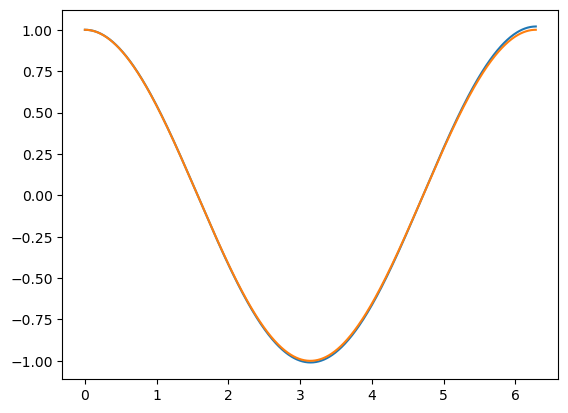

In [46]:
from numpy import *

t = linspace(0,2*pi,1000)
sol=Euler(sist_ec1, [1,0],t)

plot(t, sol[0,:])
plot(t, cos(t))


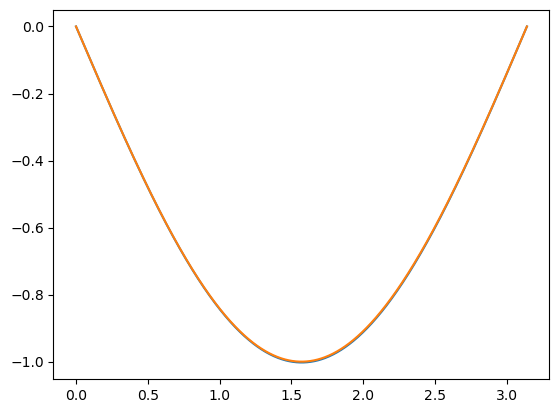

In [43]:
plot(t, sol[1,:])
plot(t, -sin(t))

In [48]:
a = array([1,2])
b = array ([3,4])

dot(a,b)



11

In [49]:
m = array ([ [5,6], [7,8] ])
m

array([[5, 6],
       [7, 8]])

In [50]:
dot(m, a)


array([17, 23])

### Integral con la Jacobiana

In [62]:
def sist_jac_ec1(x, omega2 = 1):
    
    #x=theta, u
    
    return array([ [0,1] , [-omega2,0] ] ) #lo trata como vector

In [96]:
def Integral_jac(sistema,jac, ci, t):
    delta = t[1] -t[0] 
    resultado = zeros((len(ci), len(t))) #tantos renglones como timepo de integracion y tantas columnas como ecuaciones tengo
    resultado[:,0] = array(ci) #condicion inicial
    for i in range(len(t)-1):
        #x_n+1 = x_n +g(x,n)*delta
        resultado[:,i+1] = resultado[:,i]+ sistema(resultado[:,i] )*delta
        resultado[:,i+1] += (0.5*delta**2)*dot(jac(resultado[:,i]), sistema(resultado[:,i]))
        
    return resultado

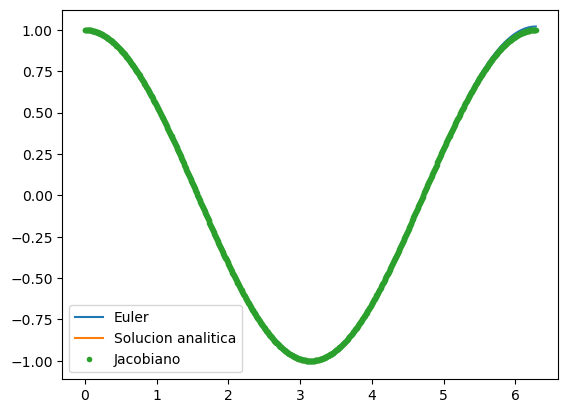

In [97]:
from numpy import *

t = linspace(0,2*pi,1000)
sol=Euler(sist_ec1, [1,0],t)
sol_j = Integral_jac(sist_ec1,sist_jac_ec1, [1,0], t)

plot(t, sol[0,:], label= "Euler")
plot(t, cos(t), label= "Solucion analitica")
plot(t,sol_j[0,:], '.' , label= "Jacobiano")
grid, legend()
show()


$$ \ddot \theta = -\omega^2 \sin \theta  $$

o bien 

$$ \dot \theta = u \\ 
\dot u = -\omega^2 \sin \theta $$


$$ \mathbb{J}=
\begin {pmatrix} 
0 & 1 \\
-\omega^2 & 0
\end {pmatrix} $$

In [95]:
def Integral_jac(sistema,jac, ci, t):
    delta = t[1] -t[0] 
    resultado = zeros((len(ci), len(t))) #tantos renglones como timepo de integracion y tantas columnas como ecuaciones tengo
    resultado[:,0] = array(ci) #condicion inicial
    for i in range(len(t)-1):
        #x_n+1 = x_n +g(x,n)*delta
        resultado[:,i+1] = resultado[:,i]+ sistema(resultado[:,i] )*delta
        resultado[:,i+1] += (0.5*delta**2)*dot(jac(resultado[:,i]), sistema(resultado[:,i]))
        
    return resultado

In [88]:
def pendulo(x, omega2 =1):
    
    return array ([ x[1], -omega2*sin(x[0]) ] ) 

def jac_sist_ec1(x, omega2 =1):
     return array ([ [0,1], [-omega2*cos(x[0]),0] ] ) 

In [89]:
from numpy import *

t =linspace(0,10,1000)
sol_pendulo = Integral_jac(pendulo, jac_pendulo, [2,0], t)
plot(t, sol_pendulo[0,:])
plot(t, cos(t))
show()

NameError: name 'jac_pendulo' is not defined

In [90]:
plot(sol_pendulo[0,:], sol_pendulo[1,:])
show()

#observamos el espacio fase

NameError: name 'sol_pendulo' is not defined

In [91]:
theta0= linspace(0.1, pi-0.1, 13)
t =linspace(0,20,2000)

for th0 in theta0:
    ci= sol_pendulo = Integral_jac(pendulo, jac_pendulo, [th0,0], t)
    plot(sol_pendulo[0,:], sol_pendulo[1,:])
show()

NameError: name 'jac_pendulo' is not defined

### modelo depredador-presa

$$ 
\dot P_c (t) = \alpha P_c  - \gamma P_c P_z \\
\dot P_z (t) = - \beta P_z +  \gamma P_c P_z 
$$ 

In [93]:
def LK(Pob, a=0.5, b=0.3 , g=0.4):
    return array ([ a*Pob[0] -g *Pob[0]*Pob[1] , -b*Pob[0] + g*Pob[0]*Pob[1] ]  )

def jac_LK(Pob, a=0.5, b=0.3 , g = 0.4 ):
    
    return array ( [a-g*Pob[1], -g *Pob[0]] , [g *Pob[1]], -b+g*Pob[0] )
    
    

In [98]:
t =linspace(0,10,1000)

sol = Integral_jac(LK, jac_LK, [1,1], t)
plot(sol[0,:], sol [1,:])
show()

TypeError: array() takes from 1 to 2 positional arguments but 3 were given

In [ ]:
t =linspace(0,10,1000)
ci = linspace(0.1, 1,15)
for Pc0 in 
sol = Integral_jac(LK, jac_LK, [Pc0,1], t)
plot(sol[0,:], sol [1,:])
show()